In [10]:
import pyautogui
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np



In [93]:
bobber = cv2.imread('assets/bobber5.png')
frame = cv2.imread('assets/valdrakken_screenshot3.jpg', cv2.IMREAD_UNCHANGED)

In [17]:
def find_edges(haystack):
    gray = cv2.cvtColor(haystack, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny
    


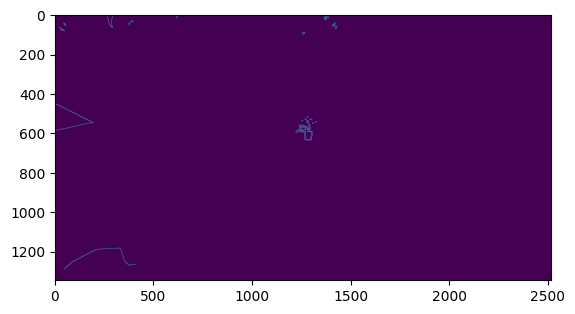

In [18]:
plt.imshow(find_edges(frame))
plt.show()



In [56]:
def region_of_interest(image):

    # create a region using the x/y of four points on a rectangle based on screen pixel dimensions
    bottom_right = (2000,1000)
    bottom_left = (500,1000)
    top_left = (500,400)
    top_right = (2000,400)
    region = np.array([[[bottom_right, bottom_left, top_left, top_right]]])

    # create a mask by starting with a black image same dimsions as the screenshot
    # and filling the region rectangle with white
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, region, 255)

    masked_image = cv2.bitwise_and(image, mask)

    return masked_image



In [96]:
def label_bobber(image, mask):
    """

    """
    image = np.copy(image)
    # Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # find the contour with the largest area (to ignore sparkles etc)
    bobber_contour = max(contours, key=cv2.contourArea)

    # draw outlines on all the contours
    cv2.drawContours(image, bobber_contour, -1, 255, 2)

    # for contour in contours:
        # create a bounding rectangle for the contour
    (x, y, w, h) = cv2.boundingRect(bobber_contour)

    # draw a rectangle around the corners
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)


    # put a dot in the middle
    cX = np.int32(x + (w/2))
    cY = np.int32(y + (h/2))
    cv2.circle(image, (cX, cY), 5, (255,255,255), -1, 1)

    # keep the centerpoint
    # center.append([cX,cY])

    # add some text for flavor
    cv2.putText(image, "bobber", (cX-25, cY-25), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)

    return image


In [98]:
image = np.copy(frame)
mask = region_of_interest(find_edges(image))
result = label_bobber(image, mask)
cv2.imshow("mask",mask)
cv2.imshow("result", result)
cv2.waitKey(0)


# cv2.imshow("result", region_of_interest(find_edges(frame)))
# cv2.waitKey(0)

113

: 